# Running models and cross validation 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn import metrics

C:\Users\luisf\AppData\Local\Temp\ipykernel_2232\4088898045.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Time series split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Loading final dataset
df = pd.read_csv('dummies_cleaned.csv')
print(df.head())
print(df.shape)

#Counting NA
nan_count = df['energy_price'].isna().sum()
print(nan_count)

#df_cleared = df.dropna(subset=['energy_price'])
#print(df_cleared.shape)

   Unnamed: 0  energy_price     biomass          gas      nuclear  year  \
0           0         44.94  252.200902  1180.283774  7185.089448  2015   
1           1         26.48  135.000000   172.000000  2596.000000  2015   
2           2         25.02   18.000000   233.000000  7185.089448  2015   
3           3         27.38   25.000000   304.000000  7185.089448  2015   
4           4         27.38  252.200902  1180.283774  7185.089448  2015   

   month  day  hour  week_number  ...  week_number_51  week_number_52  \
0      1    1     0            1  ...               0               0   
1      1    1     0            1  ...               0               0   
2      1    1     0            1  ...               0               0   
3      1    1     0            1  ...               0               0   
4      1    1     0            1  ...               0               0   

   week_number_53  day_of_week_0  day_of_week_1  day_of_week_2  day_of_week_3  \
0               0            

In [3]:
# Separating features and target variable
y = df['energy_price']
X = df.drop(['energy_price'], axis=1)

In [6]:
#Train-test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting the data
split_point = int(len(y) * 0.8)
y_train, y_test = y[0:split_point], y[split_point:]
X_train, X_test = X[0:split_point], X[split_point:]
df_train, df_test = df_cleared[0:split_point], df_cleared[split_point:]
print(y_train)

1976013     44.94
1976014     26.48
1976017     25.02
1976018     27.38
1976019     27.38
            ...  
4838646      9.45
4838647    202.81
4838648     56.96
4838649    -30.00
4838650    138.05
Name: energy_price, Length: 2697072, dtype: float64


In [7]:
# Fit model
model = ARIMA(y_train, order=(1,0,0))  # example order, adjust based on your data
fitted_model = model.fit()


# Forecast
predictions = fitted_model.forecast(steps=len(y_test))



c:\Users\cpedr\miniconda3\envs\ml_lab\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\cpedr\miniconda3\envs\ml_lab\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\cpedr\miniconda3\envs\ml_lab\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\cpedr\miniconda3\envs\ml_lab\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\cpedr\miniconda3\envs\ml_lab\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: F

In [14]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Forecasted', color='red')
plt.legend()
plt.show()

print(predictions)


ValueError: Input contains NaN.

In [10]:
print(fitted_model)

Basic linear model with latest dataset ("dummies_cleaned.csv")

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("dummies_cleaned.csv")

MemoryError: Unable to allocate 4.76 GiB for an array with shape (194, 3294780) and data type int64

In [3]:
y = df['energy_price']
X = df.drop(['energy_price'], axis=1)


In [5]:
print(y.describe)
print(X.info)

<bound method NDFrame.describe of 0          44.94
1          26.48
2          25.02
3          27.38
4          27.38
           ...  
3294775    44.87
3294776    44.87
3294777    44.87
3294778    33.30
3294779    35.14
Name: energy_price, Length: 3294780, dtype: float64>
<bound method DataFrame.info of          Unnamed: 0                 Date Country     biomass          gas  \
0                 0  2015-01-01 00:00:00      CH  252.200902  1180.283774   
1                 1  2015-01-01 00:00:00      CZ  135.000000   172.000000   
2                 2  2015-01-01 00:00:00    DK_1   18.000000   233.000000   
3                 3  2015-01-01 00:00:00    DK_2   25.000000   304.000000   
4                 4  2015-01-01 00:00:00      EE  252.200902  1180.283774   
...             ...                  ...     ...         ...          ...   
3294775     3294775  2023-12-31 00:00:00    SE_2  252.200902  1180.283774   
3294776     3294776  2023-12-31 00:00:00    SE_3  252.200902  1180.283774   
3

In [4]:
#splitting set into training and data for this naive linear model
seed = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

print(X.shape)
print(y.shape)

(3294780, 199)
(3294780,)


In [5]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [3]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [5]:
print(X_train.columns)

Index(['Unnamed: 0', 'Date', 'Country', 'biomass', 'gas', 'nuclear', 'year',
       'month', 'day', 'hour',
       ...
       'week_number_51', 'week_number_52', 'week_number_53', 'day_of_week_0',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6'],
      dtype='object', length=199)


In [6]:
X_train = X_train.drop(columns=['Date', 'Unnamed: 0', 'Country'])

In [7]:
X_test = X_test.drop(columns=['Date', 'Unnamed: 0', 'Country'])

In [ ]:
print(X_train.dtypes)

Unnamed: 0         int64
Country           object
biomass          float64
gas              float64
nuclear          float64
                  ...   
day_of_week_2      int64
day_of_week_3      int64
day_of_week_4      int64
day_of_week_5      int64
day_of_week_6      int64
Length: 198, dtype: object


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 9577.273403544055


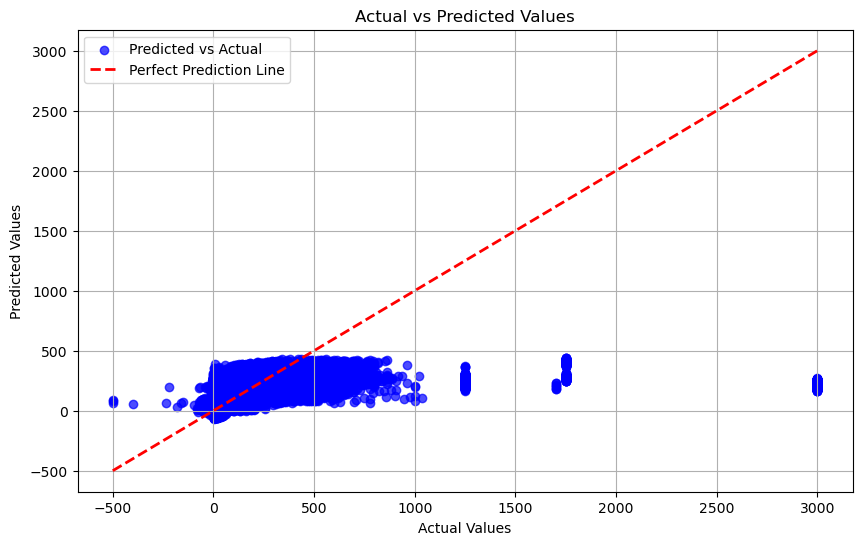

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')

# Plot a line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')

# Adding labels and title to the plot
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [36]:
y_pred = model.predict(X_test)

# Calculating MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 9577.273403544055


NameError: name 'y' is not defined

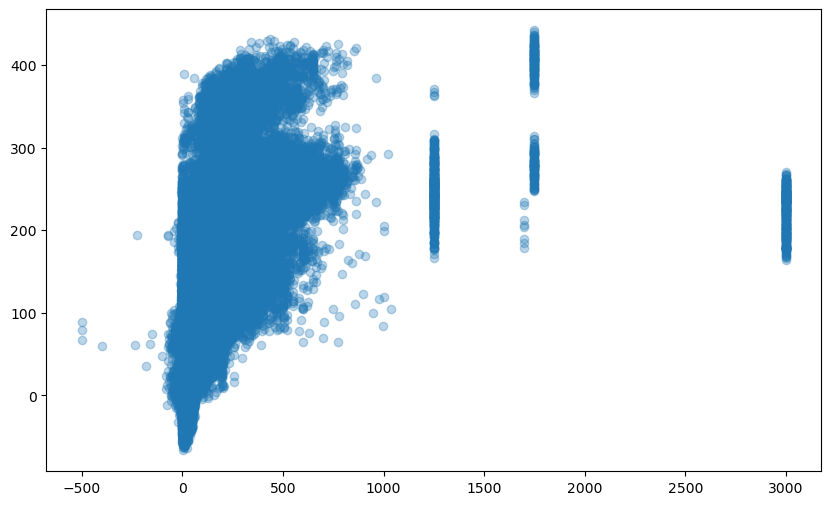

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your data
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').squeeze()
y_test = pd.read_csv('y_test.csv').squeeze()


C:\Users\luisf\AppData\Local\Temp\ipykernel_14368\2858200077.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
X_train = X_train.drop(columns=['Date', 'Unnamed: 0', 'Country'])
X_test = X_test.drop(columns=['Date', 'Unnamed: 0', 'Country'])

In [3]:

# Adjust y_train and y_test to ensure all values are positive before applying log transformation
min_y_train = y_train.min()
min_y_test = y_test.min()

# Use a shift large enough to make all data positive (if the smallest value is less than or equal to zero)
shift = 1 - min(min_y_train, min_y_test, 0)  # This ensures the minimum value is at least 1

y_train_log = np.log(y_train + shift)
y_test_log = np.log(y_test + shift)

# Fit the model on the transformed target
model = LinearRegression()
model.fit(X_train, y_train_log)

# Predict using the model
y_pred_log = model.predict(X_test)

# Transform predictions back to the original scale
y_pred = np.exp(y_pred_log) - shift

# Calculate the MSE on the original scale
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 9652.395835921465


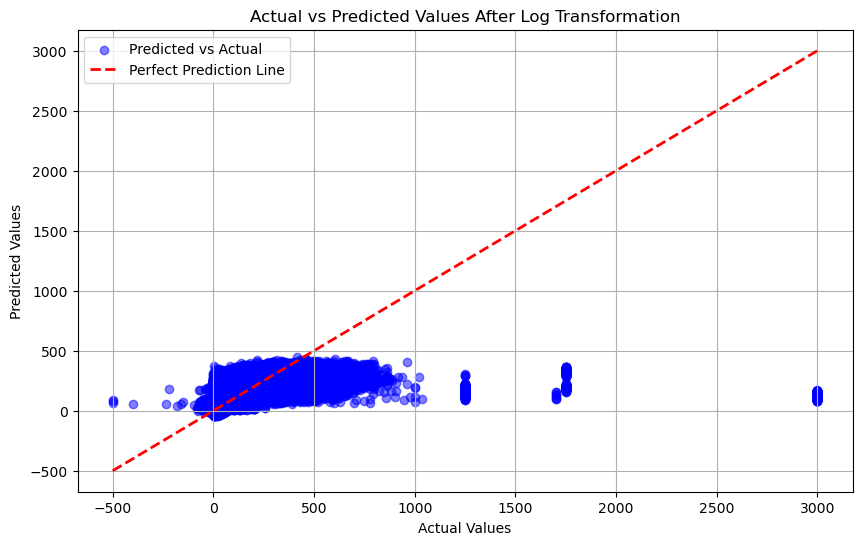

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values After Log Transformation')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
#now for timeseriessplit
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

C:\Users\luisf\AppData\Local\Temp\ipykernel_14784\3964244779.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv("dummies_cleaned.csv")
#running the model on the entire dataset

In [4]:
X = df.drop(['energy_price', 'Date', 'Country'], axis=1)  # Assume these columns are not needed
y = df['energy_price']

In [5]:
tscv = TimeSeriesSplit(n_splits=20)
model = LinearRegression()

# Use MSE as the scoring metric
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Execute cross-validation
scores = cross_val_score(model, X, y, cv=tscv, scoring=mse_scorer)
positive_mse_scores = -scores  # Convert scores to positive values
print("MSE scores per fold:", positive_mse_scores)
print("Average MSE across folds:", np.mean(positive_mse_scores))

MSE scores per fold: [3.30805931e+04 5.84036582e+06 6.16854290e+05 8.09848132e+10
 3.09936353e+03 2.73062302e+04 2.56386222e+12 1.96220892e+03
 5.88551366e+07 2.03628440e+03 5.69896644e+03 3.33937168e+03
 5.30122579e+03 1.68832150e+03 2.68721808e+03 2.48548249e+04
 1.94901561e+04 2.90318914e+04            nan            nan]
Average MSE across folds: nan


c:\Users\luisf\anaconda3\envs\MLLab\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
2 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\luisf\anaconda3\envs\MLLab\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\luisf\anaconda3\envs\MLLab\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\luisf\anaconda3\envs\MLLab\Lib\site-packages\sklearn\linear_model\_base

In [10]:
print("MSE scores per fold:")
for score in positive_mse_scores:
    print(f"{score:.4f}")  # Format the score to 4 decimal places

# Calculate and print average MSE across folds
average_mse = np.nanmean(positive_mse_scores)
print(f"Average MSE across folds: {average_mse:.4f}")
#Analysis: MSE scores seems very unstable. This could be a sign of an overfitting model, outliers, .  

MSE scores per fold:
33080.5931
5840365.8206
616854.2900
80984813192.2168
3099.3635
27306.2302
2563862218487.6616
1962.2089
58855136.6477
2036.2844
5698.9664
3339.3717
5301.2258
1688.3215
2687.2181
24854.8249
19490.1561
29031.8914
nan
nan
Average MSE across folds: 146939583534.0719


In [9]:
print("Number of samples:", len(X))
print("Minimum number of samples required per fold:", len(X) // tscv.n_splits)
print(X.isnull().sum())
print(y.isnull().sum())

Number of samples: 3294780
Minimum number of samples required per fold: 164739
Unnamed: 0       0
biomass          0
gas              0
nuclear          0
year             0
                ..
day_of_week_2    0
day_of_week_3    0
day_of_week_4    0
day_of_week_5    0
day_of_week_6    0
Length: 197, dtype: int64
0


In [11]:
#now we can try with more folds and correct the model. First scaling. 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
 

In [13]:
#columns = X.columns  # capture original column names
#X_scaled_df = pd.DataFrame(X_scaled, columns=columns)
#X_scaled_df.to_csv('X_scaled.csv', index=False)

KeyboardInterrupt: 

In [5]:
X_test.drop('Date', axis=1, inplace=True)
X_train.drop('Unnamed: 0', axis=1, inplace=True)
X_train.drop('Date', axis=1, inplace=True)

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler

C:\Users\luisf\AppData\Local\Temp\ipykernel_17080\3624062442.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
X_test = pd.read_csv('X_test.csv')
X_train = pd.read_csv('X_train.csv')
y_test= pd.read_csv('y_test.csv')
y_train= pd.read_csv('y_train.csv')

KeyboardInterrupt: 

In [3]:
X_test = pd.read_csv('X_test.csv')
X_train = pd.read_csv('X_train.csv')

In [13]:
columns = X_train.columns

In [14]:
print("Column Names in X_train:")
for column in columns:
    print(column)

Column Names in X_train:
biomass
gas
nuclear
year
month
day
hour
week_number
day_of_week
weekend
Country_BE
Country_BG
Country_CH
Country_CZ
Country_Combined_AT_DE_AT_LU
Country_DK_1
Country_DK_2
Country_EE
Country_ES
Country_FI
Country_FR
Country_GB
Country_GR
Country_HR
Country_HU
Country_IT_BRNN
Country_IT_CNOR
Country_IT_CSUD
Country_IT_FOGN
Country_IT_GR
Country_IT_NORD
Country_IT_NORD_AT
Country_IT_NORD_CH
Country_IT_NORD_FR
Country_IT_NORD_SI
Country_IT_PRGP
Country_IT_SACO_AC
Country_IT_SACO_DC
Country_IT_SARD
Country_IT_SICI
Country_IT_SUD
Country_LV
Country_ME
Country_MK
Country_NL
Country_NO_1
Country_NO_2
Country_NO_3
Country_NO_4
Country_NO_5
Country_PL
Country_PT
Country_RO
Country_RS
Country_SE_1
Country_SE_2
Country_SE_3
Country_SE_4
Country_SI
Country_SK
year_2015
year_2016
year_2017
year_2018
year_2019
year_2020
year_2021
year_2022
year_2023
month_1
month_2
month_3
month_4
month_5
month_6
month_7
month_8
month_9
month_10
month_11
month_12
day_1
day_2
day_3
day_4
day_5

In [10]:
X_test = X_test.drop(['Date', 'Country'], axis=1)
X_train = X_train.drop(['Date', 'Country'], axis=1)

In [11]:
X_test = X_test.drop(['Unnamed: 0'], axis=1)
X_train = X_train.drop(['Unnamed: 0'], axis=1)

In [15]:
scaler = StandardScaler()

In [17]:
continuous_vars = ['biomass', 'gas', 'nuclear']
dummy_vars = X_train.drop(columns=continuous_vars)

In [18]:
X_train_scaled_continuous = scaler.fit_transform(X_train[continuous_vars])

# Convert the scaled array back to a DataFrame
X_train_scaled_continuous = pd.DataFrame(X_train_scaled_continuous, columns=continuous_vars, index=X_train.index)

In [19]:
X_train_final = pd.concat([X_train_scaled_continuous, dummy_vars], axis=1)
X_train_final.to_csv('X_train_scaled.csv', index=False)

In [20]:
X_test_scaled_continuous = scaler.transform(X_test[continuous_vars])

# Convert the scaled array back to a DataFrame
X_test_scaled_continuous = pd.DataFrame(X_test_scaled_continuous, columns=continuous_vars, index=X_test.index)

# Concatenate scaled continuous variables back with dummy variables
X_test_final = pd.concat([X_test_scaled_continuous, X_test[dummy_vars.columns]], axis=1)  # Ensure dummy columns align

# Save the test DataFrame (Optional)
X_test_final.to_csv('X_test_scaled.csv', index=False)

In [2]:
X_train_scaled = pd.read_csv("X_train_scaled.csv")
X_test_scaled = pd.read_csv("X_test_scaled.csv")

In [4]:
X_train_scaled

,biomass,gas,nuclear,year,month,day,hour,week_number,day_of_week,weekend,...,week_number_51,week_number_52,week_number_53,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,-0.421234,-0.724768,0.000037,2023,8,29,11,35,1,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.000206,0.000200,0.000037,2020,7,22,17,30,2,0,...,0,0,0,0,0,1,0,0,0,0
2,0.187233,3.166908,8.019487,2019,1,6,3,1,6,1,...,0,0,0,0,0,0,0,0,0,1
3,-0.000206,0.000200,0.000037,2015,11,19,7,47,3,0,...,0,0,0,0,0,0,1,0,0,0
4,-0.000206,-0.727853,-0.242634,2023,1,10,22,2,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635819,0.074932,1.125767,6.293691,2019,5,15,14,20,2,0,...,0,0,0,0,0,1,0,0,0,0
2635820,-0.000206,0.000200,0.000037,2021,4,10,22,14,5,1,...,0,0,0,0,0,0,0,0,1,0
2635821,-0.000206,0.754426,0.000037,2020,11,26,9,48,3,0,...,0,0,0,0,0,0,1,0,0,0
2635822,-0.449820,-0.595231,-0.885468,2022,6,26,18,25,6,1,...,0,0,0,0,0,0,0,0,0,1


In [3]:
y_test = pd.read_csv("y_test.csv")
y_train=pd.read_csv("y_train.csv")
#X_train_scaled = pd.read_csv("X_train_scaled.csv")
#X_test_scaled = pd.read_csv("X_test_scaled.csv")

In [10]:
alphas = np.logspace(-1, 10, 13)

# Set up the RidgeCV model; store_cv_values=True allows storing of cross-validation values if needed for inspection
tscv = TimeSeriesSplit(n_splits=20)

# Initialize RidgeCV with the defined alphas and TimeSeriesSplit
ridge_cv = RidgeCV(alphas=alphas, cv=tscv, scoring='neg_mean_squared_error')

# Fit RidgeCV on the entire training data
ridge_cv.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([1.00000000e-01, 8.25404185e-01, 6.81292069e+00, 5.62341325e+01,
       4.64158883e+02, 3.83118685e+03, 3.16227766e+04, 2.61015722e+05,
       2.15443469e+06, 1.77827941e+07, 1.46779927e+08, 1.21152766e+09,
       1.00000000e+10]),
        cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=20, test_size=None),
        scoring='neg_mean_squared_error')

In [11]:
y_pred_cv = ridge_cv.predict(X_test_scaled)

# Calculate the Mean Squared Error on the test set
mse_ridge_cv = mean_squared_error(y_test, y_pred_cv)
print(f"Mean Squared Error for RidgeCV: {mse_ridge_cv}")
print(f"Optimal alpha chosen by RidgeCV: {ridge_cv.alpha_}")

Mean Squared Error for RidgeCV: 9577.271023553787
Optimal alpha chosen by RidgeCV: 6.812920690579611


In [19]:
print(type(y_pred_cv))
print(y_pred_cv.shape)

<class 'numpy.ndarray'>
(658956, 1)


In [ ]:
y_pred_cv_flat = y_pred_cv.ravel()

In [22]:
if isinstance(y_test, pd.DataFrame) and y_test.shape[1] == 1:
    y_test_array = y_test.iloc[:, 0].values  # .values or .to_numpy() to get the array
else:
    y_test_array = y_test

In [23]:
if y_pred_cv.ndim > 1:
    y_pred_cv = y_pred_cv.ravel()

In [24]:
results_df = pd.DataFrame({
    'Actual_Values': y_test_array,
    'Predicted_Values': y_pred_cv
})

In [27]:
results_df.to_csv('ridgeCV_actual_vs_predicted.csv', index=True)

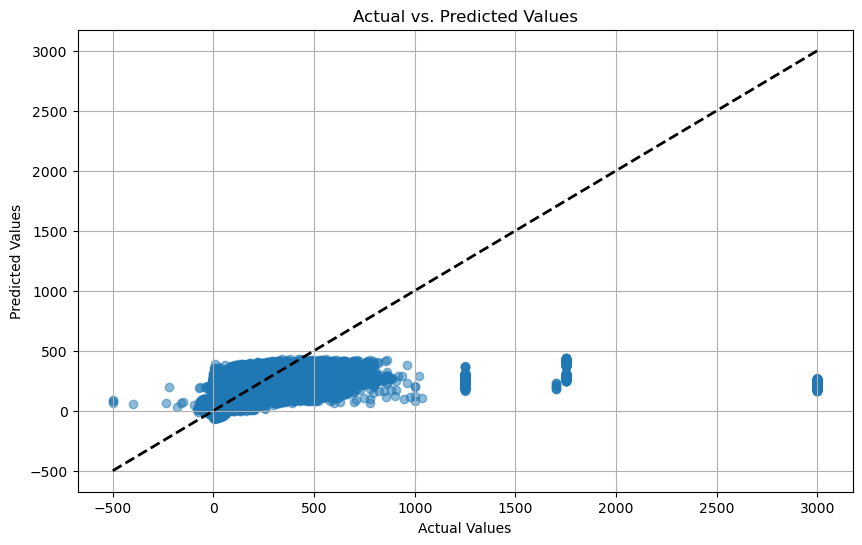

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_cv, alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line from the lowest value to the highest to show perfect predictions
plt.grid(True)
plt.show()

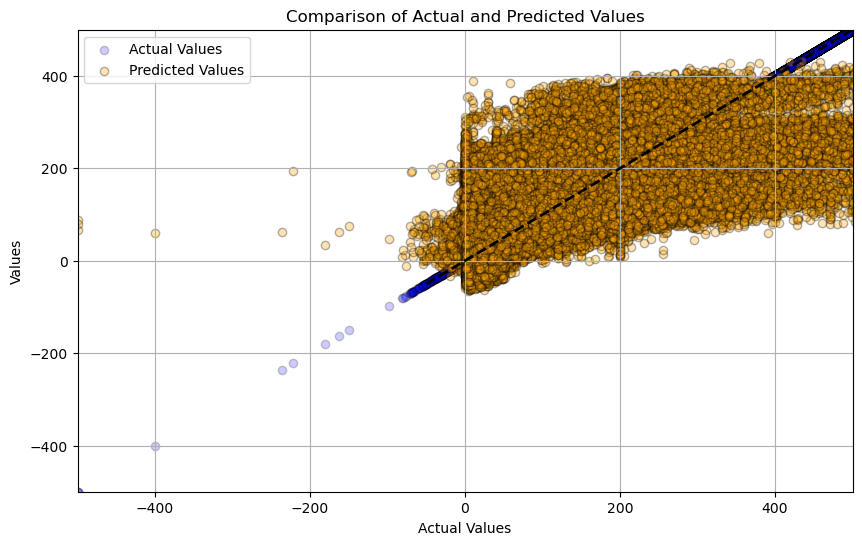

In [41]:
import matplotlib.pyplot as plt

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_test, alpha=0.2, color='blue', label='Actual Values',edgecolor='k')

# Scatter plot for predicted values
plt.scatter(y_test, y_pred_cv, alpha=0.3, color='orange', label='Predicted Values',edgecolor='k')

# Add titles and labels
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Values')

# Set plot limits
plt.xlim(-500, 500)
plt.ylim(-500, 500)

# Add a line of perfect prediction
plt.plot([-50, 500], [-50, 500], 'k--', lw=2)

# Legend to distinguish plots
plt.legend()

# Grid for better visibility of points
plt.grid(True)

# Show the plot
plt.show()

In [39]:
y_test

,energy_price
0,47.46
1,46.98
2,12.89
3,29.90
4,176.66
...,...
658951,104.19
658952,51.42
658953,37.83
658954,64.46


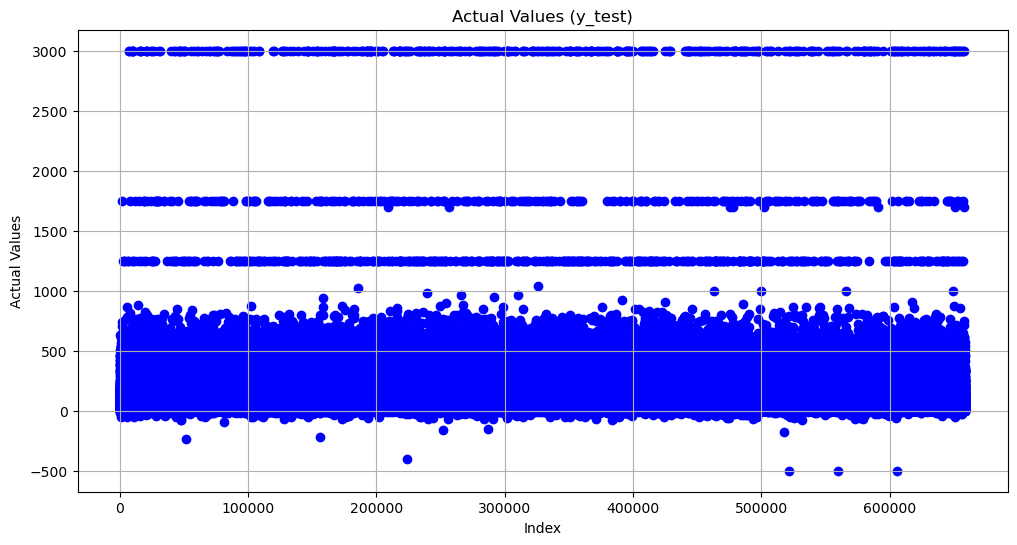

In [40]:
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', marker='o')
plt.title('Actual Values (y_test)')
plt.xlabel('Index')
plt.ylabel('Actual Values')
plt.grid(True)
plt.show()

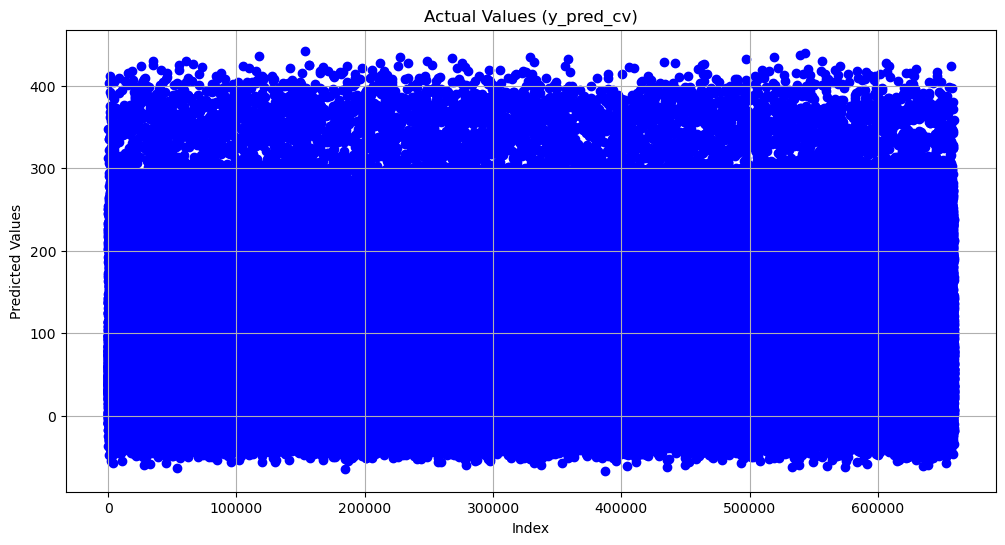

In [42]:
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_pred_cv)), y_pred_cv, color='blue', marker='o')
plt.title('Predicted Values (y_pred_cv)')
plt.xlabel('Index')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [44]:
#rerun with mse per splits. 
alphas = np.logspace(-1, 10, 13)
tscv = TimeSeriesSplit(n_splits=20)

In [47]:
mse_scores = []
alphas_chosen = []

for train_index, test_index in tscv.split(X_train_scaled):
    X_train_fold, X_test_fold = X_train_scaled.iloc[train_index], X_train_scaled.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Fit RidgeCV on the fold to determine the best alpha
    ridge_cv_fold = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=None)  # cv=None for fitting on the given split without further splitting
    ridge_cv_fold.fit(X_train_fold, y_train_fold)
    
    # Store the alpha chosen
    alphas_chosen.append(ridge_cv_fold.alpha_)

    # Evaluate on the test part of the fold
    y_pred_fold = ridge_cv_fold.predict(X_test_fold)
    mse_fold = mean_squared_error(y_test_fold, y_pred_fold)
    mse_scores.append(mse_fold)

# Print the MSE for each fold
print("MSE per fold:")
for i, mse in enumerate(mse_scores, start=1):
    print(f"Fold {i}: MSE = {mse}")

# Print the alphas chosen for each fold
print("Alphas chosen per fold:", alphas_chosen)


MemoryError: Unable to allocate 3.32 GiB for an array with shape (2259279, 197) and data type float64

In [ ]:
results_df = pd.DataFrame({
    'Fold': range(1, len(mse_scores) + 1),
    'MSE': mse_scores,
    'Alpha': alphas_chosen
})

# Save to CSV
results_df.to_csv('ridge_cv_mse_per_fold.csv', index=False)

In [2]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

C:\Users\luisf\AppData\Local\Temp\ipykernel_15296\982240550.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [8]:
X_train_scaled

,biomass,gas,nuclear,year,month,day,hour,week_number,day_of_week,weekend,...,week_number_51,week_number_52,week_number_53,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,-0.421234,-0.724768,0.000037,2023,8,29,11,35,1,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.000206,0.000200,0.000037,2020,7,22,17,30,2,0,...,0,0,0,0,0,1,0,0,0,0
2,0.187233,3.166908,8.019487,2019,1,6,3,1,6,1,...,0,0,0,0,0,0,0,0,0,1
3,-0.000206,0.000200,0.000037,2015,11,19,7,47,3,0,...,0,0,0,0,0,0,1,0,0,0
4,-0.000206,-0.727853,-0.242634,2023,1,10,22,2,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635819,0.074932,1.125767,6.293691,2019,5,15,14,20,2,0,...,0,0,0,0,0,1,0,0,0,0
2635820,-0.000206,0.000200,0.000037,2021,4,10,22,14,5,1,...,0,0,0,0,0,0,0,0,1,0
2635821,-0.000206,0.754426,0.000037,2020,11,26,9,48,3,0,...,0,0,0,0,0,0,1,0,0,0
2635822,-0.449820,-0.595231,-0.885468,2022,6,26,18,25,6,1,...,0,0,0,0,0,0,0,0,0,1


In [13]:
lasso = LassoCV(cv=TimeSeriesSplit(n_splits=20), random_state=42, alphas=np.logspace(-10, 10, 30))

# Fit Lasso
lasso.fit(X_train_scaled, y_train.values.ravel())

# Predict
y_pred_train = lasso.predict(X_train_scaled)
y_pred_test = lasso.predict(X_test_scaled)

# Calculate MSE
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'Training MSE: {mse_train}')
print(f'Test MSE: {mse_test}')
print(f'Optimal Alpha: {lasso.alpha_}')

c:\Users\luisf\anaconda3\envs\MLLab\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 419938279.3520936, tolerance: 191019.619143831
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\luisf\anaconda3\envs\MLLab\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 614075677.4442271, tolerance: 191019.619143831
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\luisf\anaconda3\envs\MLLab\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 625168273.8848795, tolerance: 191019.619143831
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\luisf\anaconda3\envs\MLLab\Lib\site-packages\sklearn\li

Training MSE: 9797.087943261742
Test MSE: 9577.330706353865
Optimal Alpha: 0.0007880462815669921


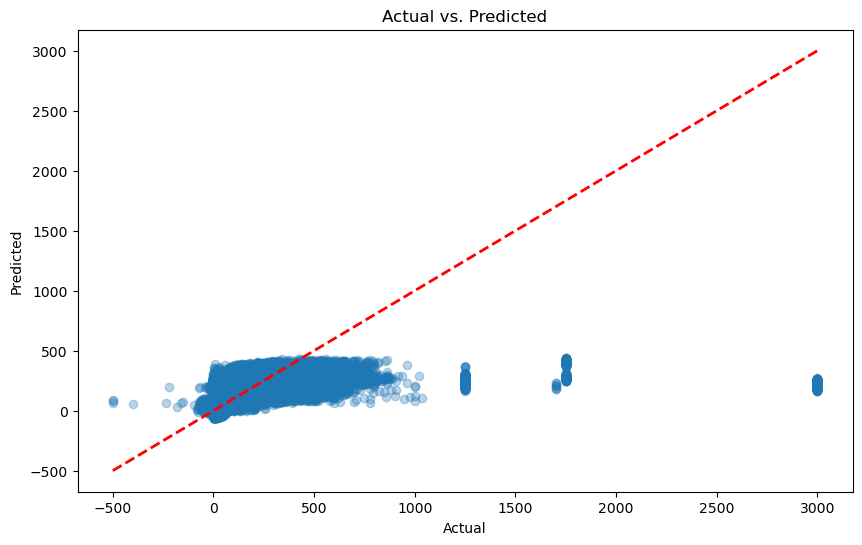

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

New lasso with selected features

In [3]:
selected_features = [
    'biomass', 'gas', 'nuclear', 
    'year_2015', 'year_2016', 'year_2017', 'year_2018', 'year_2019', 'year_2020', 
    'year_2021', 'year_2022', 'year_2023', 
    'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 
    'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12'
]

In [4]:
X_train_selected = X_train_scaled[selected_features]
X_test_selected = X_test_scaled[selected_features]

In [20]:
lasso_selected = LassoCV(cv=TimeSeriesSplit(n_splits=20), random_state=42, alphas=np.logspace(-10, 10, 30))

# Fit LassoCV on the training data with selected features
lasso_selected.fit(X_train_selected, y_train.values.ravel())

# Predict on the test data with selected features
y_pred_test_selected = lasso_selected.predict(X_test_selected)

# Calculate MSE for the test predictions
mse_test_sel = mean_squared_error(y_test, y_pred_test_selected)
print(f'MSE: {mse_test_sel}')
print(f'Optimal Alpha: {lasso.alpha_}')

c:\Users\luisf\anaconda3\envs\MLLab\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.435e+08, tolerance: 3.827e+06
  model = cd_fast.enet_coordinate_descent(


Test MSE: 11028.820914733033
Optimal Alpha: 0.0007880462815669921


Create LassoCV with interactions between biomass, gas, nuclear and temporal structure 

In [2]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

C:\Users\luisf\AppData\Local\Temp\ipykernel_2612\982240550.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
y_test = pd.read_csv("y_test.csv")
y_train=pd.read_csv("y_train.csv")
X_train_scaled = pd.read_csv("X_train_scaled.csv")
X_test_scaled = pd.read_csv("X_test_scaled.csv")

In [4]:
energy_features = ['biomass', 'gas', 'nuclear']
years = [f'year_{year}' for year in range(2020, 2024)]
#months = [f'month_{month}' for month in range(1, 13)]

# Create interaction terms in both training and testing datasets
for energy in energy_features:
    for year in years:
        X_train_scaled[f'{energy}_{year}'] = X_train_scaled[energy] * X_train_scaled[year]
        X_test_scaled[f'{energy}_{year}'] = X_test_scaled[energy] * X_test_scaled[year]

    #for month in months:
     #   X_train_scaled[f'{energy}_{month}'] = X_train_scaled[energy] * X_train_scaled[month]
      #  X_test_scaled[f'{energy}_{month}'] = X_test_scaled[energy] * X_test_scaled[month]

In [5]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV
import numpy as np

lasso_with_interactions = LassoCV(cv=TimeSeriesSplit(n_splits=20), random_state=42, alphas=np.logspace(-1, 1, 20))
lasso_with_interactions.fit(X_train_scaled, y_train.values.ravel())

# Predict using the model
y_pred_test_interactions = lasso_with_interactions.predict(X_test_scaled)

# Evaluate the model
mse_test_interactions = mean_squared_error(y_test, y_pred_test_interactions)
print(f'MSE with Interactions: {mse_test_interactions}')
print(f'Optimal Alpha with Interactions: {lasso_with_interactions.alpha_}')

MSE with Interactions: 9552.11439556307
Optimal Alpha with Interactions: 0.1


In [7]:
from sklearn.metrics import accuracy_score

# Define a threshold for binary classification (e.g., using the mean of the training targets)
threshold = y_train.values.ravel().mean()  # Ensure threshold is a scalar

# Binarize the predictions and the true values based on the threshold
y_pred_binary = (y_pred_test_interactions >= threshold).astype(int)
y_test_binary = (y_test.values.ravel() >= threshold).astype(int)

accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8497547635957484


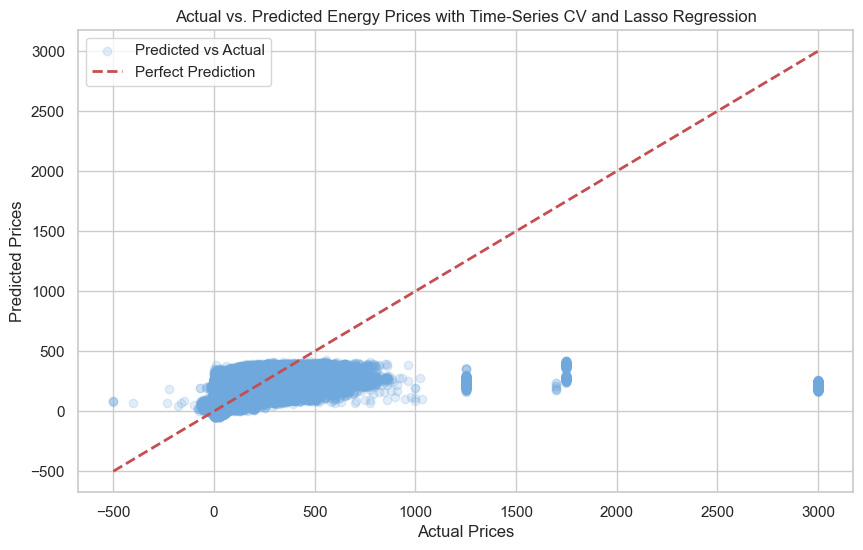

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plot
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_interactions, color='#6fa8dc', alpha=0.2, label='Predicted vs Actual')

# Plot a reference line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')

# Adding titles and labels
plt.title('Actual vs. Predicted Energy Prices with Time-Series CV and Lasso Regression')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()

# Show the plot
plt.show()

Shape of X_train_scaled: (2635824, 208)
Number of coefficients: 208


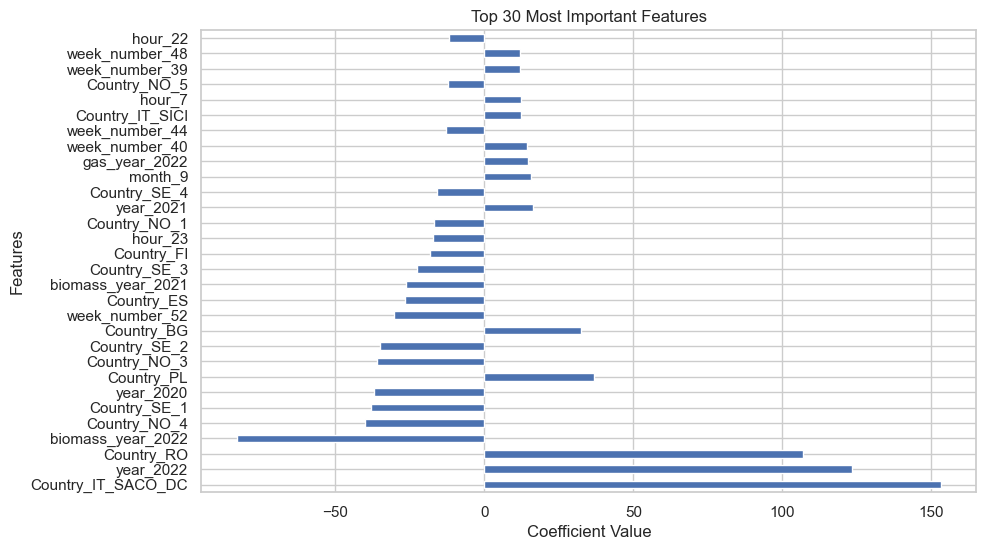

               Feature  Importance
0   Country_IT_SACO_DC  153.243152
1            year_2022  123.472929
2           Country_RO  106.826587
7           Country_PL   36.731475
10          Country_BG   32.432172
18           year_2021   16.360169
20             month_9   15.770323
21       gas_year_2022   14.476221
22      week_number_40   14.173134
24     Country_IT_SICI   12.372798
25              hour_7   12.369764
27      week_number_39   12.093031
28      week_number_48   11.965544
29             hour_22  -11.847263
26        Country_NO_5  -12.133280
23      week_number_44  -12.819739
19        Country_SE_4  -16.049271
17        Country_NO_1  -16.986351
16             hour_23  -17.358209
15          Country_FI  -18.225883
14        Country_SE_3  -22.618004
13   biomass_year_2021  -26.272367
12          Country_ES  -26.772078
11      week_number_52  -30.427582
9         Country_SE_2  -35.151870
8         Country_NO_3  -35.945502
6            year_2020  -37.191883
5         Country_SE

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract coefficients (feature importance) from the Lasso regression model
coefficients = lasso_with_interactions.coef_

# Get column names from the DataFrame
feature_names = X_train_scaled.columns

# Check the shape of X_train_scaled and the number of coefficients
print(f'Shape of X_train_scaled: {X_train_scaled.shape}')
print(f'Number of coefficients: {len(coefficients)}')

# Ensure the lengths match
if len(coefficients) == len(feature_names):
    # Create a Series for the coefficients for easier plotting
    coeff_series_all = pd.Series(coefficients, index=feature_names)

    # Sort the coefficients by absolute value for better visualization
    sorted_coeffs_all = coeff_series_all.reindex(coeff_series_all.abs().sort_values(ascending=False).index)

    # Select the top 10 features with the largest absolute coefficients
    top_10_features = sorted_coeffs_all.head(30)

    # Plotting
    plt.figure(figsize=(10, 6))
    top_10_features.plot(kind='barh')
    plt.title('Top 30 Most Important Features')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Features')
    plt.show()

    # Create a feature-importance matrix
    feature_importance_matrix = pd.DataFrame({
        'Feature': top_10_features.index,
        'Importance': top_10_features.values
    }).sort_values(by='Importance', ascending=False)

    # Save the feature-importance matrix to a CSV file
    feature_importance_matrix.to_csv('top_10_feature_importance_matrix.csv', index=False)

    # Display the feature-importance matrix
    print(feature_importance_matrix)
else:
    print("Mismatch in the number of coefficients and feature names. Please check your preprocessing steps.")


## Last part: create a model with energy_price_target 

In [3]:
#now try with energy_price_target'
df_dates = pd.read_csv("dates_shift.csv")

In [4]:
df_dates['year']

0          2015
1          2015
2          2015
3          2015
4          2015
           ... 
3294175    2023
3294176    2023
3294177    2023
3294178    2023
3294179    2023
Name: year, Length: 3294180, dtype: int64

In [6]:
for col in df_dates.columns:
    print(col)

Unnamed: 0
Date
Country
energy_price
biomass
gas
nuclear
year
month
day
hour
week_number
day_of_week
weekend
Country_BE
Country_BG
Country_CH
Country_CZ
Country_Combined_AT_DE_AT_LU
Country_DK_1
Country_DK_2
Country_EE
Country_ES
Country_FI
Country_FR
Country_GB
Country_GR
Country_HR
Country_HU
Country_IT_BRNN
Country_IT_CNOR
Country_IT_CSUD
Country_IT_FOGN
Country_IT_GR
Country_IT_NORD
Country_IT_NORD_AT
Country_IT_NORD_CH
Country_IT_NORD_FR
Country_IT_NORD_SI
Country_IT_PRGP
Country_IT_SACO_AC
Country_IT_SACO_DC
Country_IT_SARD
Country_IT_SICI
Country_IT_SUD
Country_LV
Country_ME
Country_MK
Country_NL
Country_NO_1
Country_NO_2
Country_NO_3
Country_NO_4
Country_NO_5
Country_PL
Country_PT
Country_RO
Country_RS
Country_SE_1
Country_SE_2
Country_SE_3
Country_SE_4
Country_SI
Country_SK
year_2015
year_2016
year_2017
year_2018
year_2019
year_2020
year_2021
year_2022
year_2023
month_1
month_2
month_3
month_4
month_5
month_6
month_7
month_8
month_9
month_10
month_11
month_12
day_1
day_2
day_3

In [3]:
X = df_dates.drop(columns=['Unnamed: 0', 'Date', 'Country', 'energy_price', 'energy_price_target'])

# Isolate the target variable into y
y = df_dates['energy_price_target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
X_train_shift = X_train
X_test_shift = X_test
y_train_shift = y_train
y_test_shift = y_test
X_train_shift.to_csv('X_train_shift.csv', index=False)
X_test_shift.to_csv('X_test_shift.csv', index=False)

# Save the training and testing target sets to CSV
y_train_shift.to_csv('y_train_shift.csv', index=False)
y_test_shift.to_csv('y_test_shift.csv', index=False)

In [1]:
import pandas as pd

# Reading the CSV files into DataFrames
X_train_shift = pd.read_csv('X_train_shift.csv')
X_test_shift = pd.read_csv('X_test_shift.csv')
y_train_shift = pd.read_csv('y_train_shift.csv')
y_test_shift = pd.read_csv('y_test_shift.csv')

C:\Users\luisf\AppData\Local\Temp\ipykernel_8008\1146846492.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
from sklearn.linear_model import LinearRegression

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_shift, y_train_shift)

LinearRegression()

In [6]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test_shift)

# Calculate the MSE
mse = mean_squared_error(y_test_shift, y_pred)
print(f'Test MSE: {mse}')

Test MSE: 9897.599035170393


In [7]:
import matplotlib.pyplot as plt

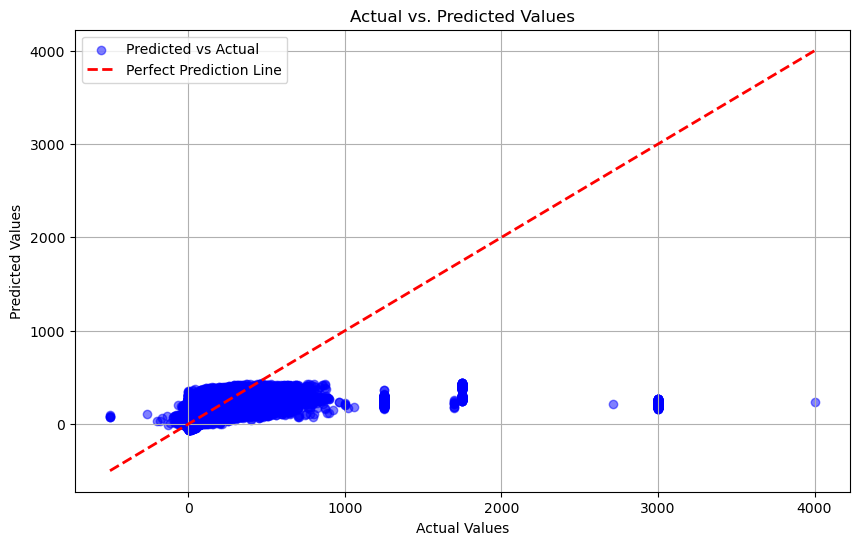

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_shift, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')

# Plot a line for perfect predictions
plt.plot([y_test_shift.min(), y_test_shift.max()], [y_test_shift.min(), y_test_shift.max()], 'r--', lw=2, label='Perfect Prediction Line')

# Adding plot labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Last linear model. Use all 2015-2022. Leave 2023 as training

In [6]:
train = df_dates[df_dates['year'] <= 2022]
test = df_dates[df_dates['year'] == 2023]

In [8]:
X_train = train.drop(columns=['energy_price_target', 'Date', 'Unnamed: 0', 'Country', 'energy_price'])  
y_train = train['energy_price_target']

X_test = test.drop(columns=['energy_price_target', 'Date', 'Unnamed: 0', 'Country', 'energy_price'])
y_test = test['energy_price_target']

In [9]:
# Save X_train to a CSV file
X_train.to_csv('X_train_shift_year.csv', index=False)

# Save X_test to a CSV file
X_test.to_csv('X_test_shift_year.csv', index=False)
y_train.to_csv('y_train_shift_year.csv', index=False)

# Save y_test to a CSV file
y_test.to_csv('y_test_shift_year.csv', index=False)

In [1]:
import pandas as pd

# Load the datasets from CSV files
X_train = pd.read_csv('X_train_shift_year.csv')
X_test = pd.read_csv('X_test_shift_year.csv')
y_train = pd.read_csv('y_train_shift_year.csv')
y_test = pd.read_csv('y_test_shift_year.csv')

C:\Users\luisf\AppData\Local\Temp\ipykernel_9800\4241047028.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
y_train = y_train.iloc[:, 0]
y_test = y_test.iloc[:, 0]

In [2]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [4]:
from sklearn.metrics import mean_squared_error

# Make predictions using the test set
y_pred = model.predict(X_test)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Test MSE: {mse}')

Test MSE: 11943472391691.738


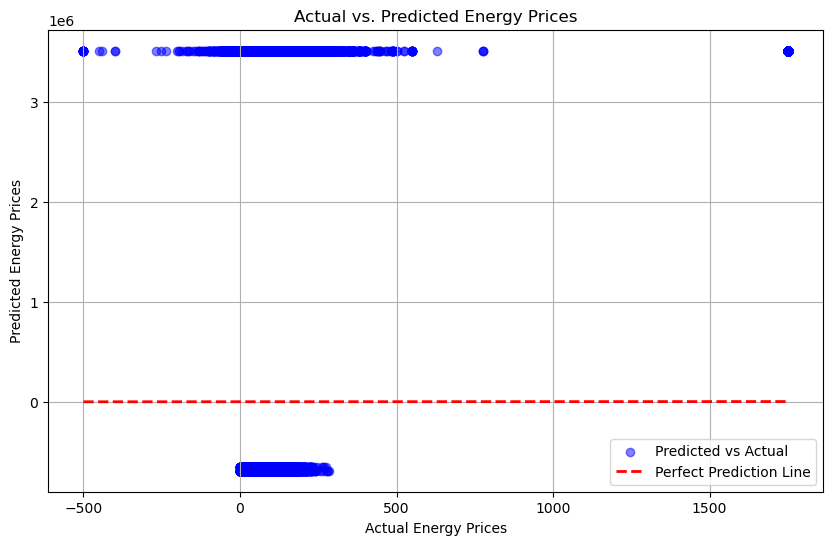

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')

# Adding labels and title to the plot
plt.xlabel('Actual Energy Prices')
plt.ylabel('Predicted Energy Prices')
plt.title('Actual vs. Predicted Energy Prices')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

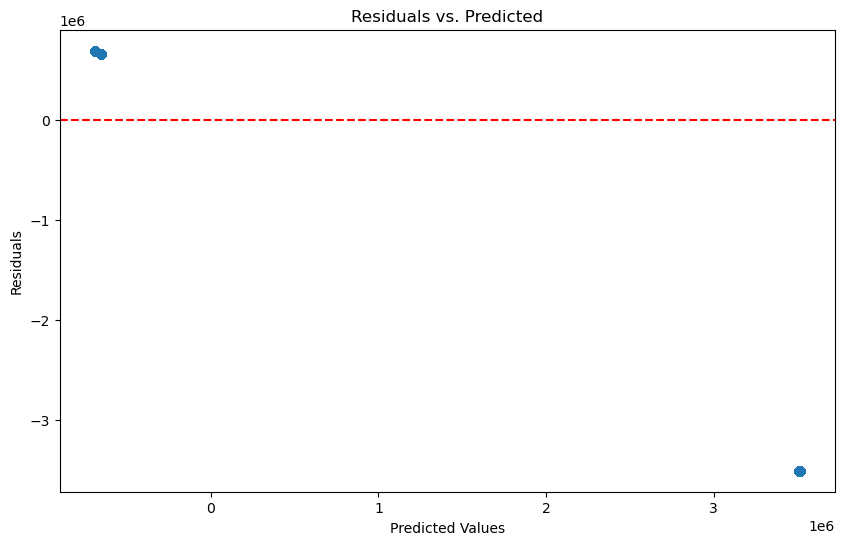

In [6]:
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted')
plt.show()

Now we can create a polynomial model with this new energy_shifted price. 

In [1]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
import numpy as np


C:\Users\luisf\AppData\Local\Temp\ipykernel_1448\3907667503.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
X_train = pd.read_csv('X_train_shift.csv')
X_test = pd.read_csv('X_test_shift.csv')
y_train = pd.read_csv('y_train_shift.csv')
y_test = pd.read_csv('y_test_shift.csv')

In [ ]:
print(X_train.columns)
for col in X_train.columns:
    print(col)

Index(['biomass', 'gas', 'nuclear', 'year', 'month', 'day', 'hour',
       'week_number', 'day_of_week', 'weekend',
       ...
       'week_number_51', 'week_number_52', 'week_number_53', 'day_of_week_0',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6'],
      dtype='object', length=196)
biomass
gas
nuclear
year
month
day
hour
week_number
day_of_week
weekend
Country_BE
Country_BG
Country_CH
Country_CZ
Country_Combined_AT_DE_AT_LU
Country_DK_1
Country_DK_2
Country_EE
Country_ES
Country_FI
Country_FR
Country_GB
Country_GR
Country_HR
Country_HU
Country_IT_BRNN
Country_IT_CNOR
Country_IT_CSUD
Country_IT_FOGN
Country_IT_GR
Country_IT_NORD
Country_IT_NORD_AT
Country_IT_NORD_CH
Country_IT_NORD_FR
Country_IT_NORD_SI
Country_IT_PRGP
Country_IT_SACO_AC
Country_IT_SACO_DC
Country_IT_SARD
Country_IT_SICI
Country_IT_SUD
Country_LV
Country_ME
Country_MK
Country_NL
Country_NO_1
Country_NO_2
Country_NO_3
Country_NO_4
Country_NO_5
Count

In [3]:
energy_features = ['biomass', 'gas', 'nuclear','weekend','year_2021','year_2022','year_2023']
#time_features = [col for col in X_train.columns if col.startswith('year_')]
#col.startswith('month_') or 
# Combine the lists
features_to_keep = energy_features 
#+ time_features

In [4]:
X_train = X_train[features_to_keep]
X_test = X_test[features_to_keep]

In [6]:
print("Columns in X_train:", X_train.columns)
print("Columns in X_test:", X_test.columns)

Columns in X_train: Index(['biomass', 'gas', 'nuclear', 'weekend', 'year_2021', 'year_2022',
       'year_2023'],
      dtype='object')
Columns in X_test: Index(['biomass', 'gas', 'nuclear', 'weekend', 'year_2021', 'year_2022',
       'year_2023'],
      dtype='object')


In [6]:
degree = 3  # You can adjust this degree based on how complex you want the model to be

# Create a pipeline that first transforms the data to polynomial features, then fits a linear model
model = Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('linear', LinearRegression())
])

# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression())])

In [7]:
y_pred = model.predict(X_test)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Test MSE: {mse}')

Test MSE: 11123.742394660521


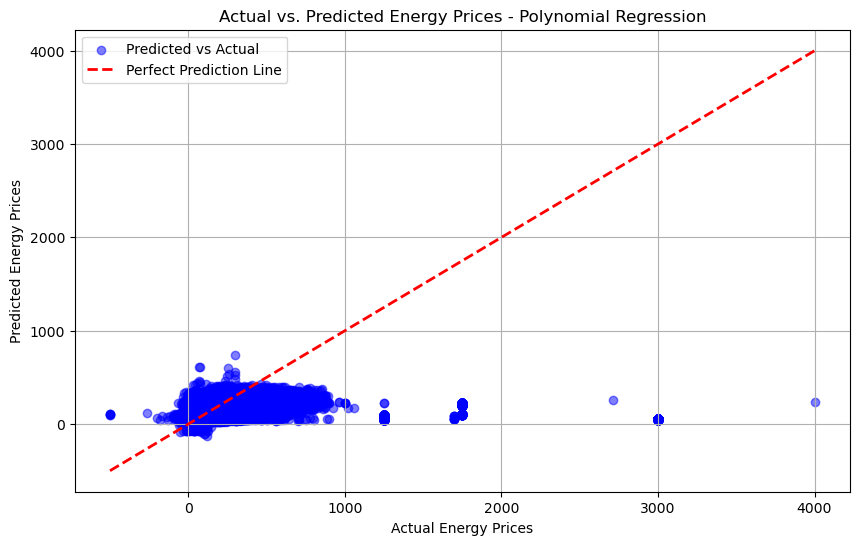

In [8]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')

# Adding labels and title to the plot
plt.xlabel('Actual Energy Prices')
plt.ylabel('Predicted Energy Prices')
plt.title('Actual vs. Predicted Energy Prices - Polynomial Regression')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

now with timeseries split

In [7]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np

In [18]:
y_train_fold = y_train.iloc[train_index]['energy_price_target']  # This will return a Series if 'y_train' is a DataFrame
y_test_fold = y_train.iloc[test_index]['energy_price_target'] 

In [19]:
n_splits = 10
tscv = TimeSeriesSplit(n_splits=n_splits)
degree = 3
model = Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('linear', LinearRegression())
])

all_y_pred = []
all_y_actual = []
mse_scores = []

# Run the cross-validation
for train_index, test_index in tscv.split(X_train):
    X_train_fold = X_train.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_train_fold = y_train.iloc[train_index].squeeze()  # Ensure it's a Series
    y_test_fold = y_train.iloc[test_index].squeeze()  # Ensure it's a Series

    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_test_fold)
    
    all_y_pred.extend(y_pred_fold)  # No need to convert to list if already in compatible format
    all_y_actual.extend(y_test_fold)

    mse = mean_squared_error(y_test_fold, y_pred_fold)
    mse_scores.append(mse)

# Calculate the average MSE
average_mse = np.mean(mse_scores)
print(f'Average MSE across all folds: {average_mse}')


Average MSE across all folds: 10893.064377583436


In [21]:
import matplotlib.pyplot as plt

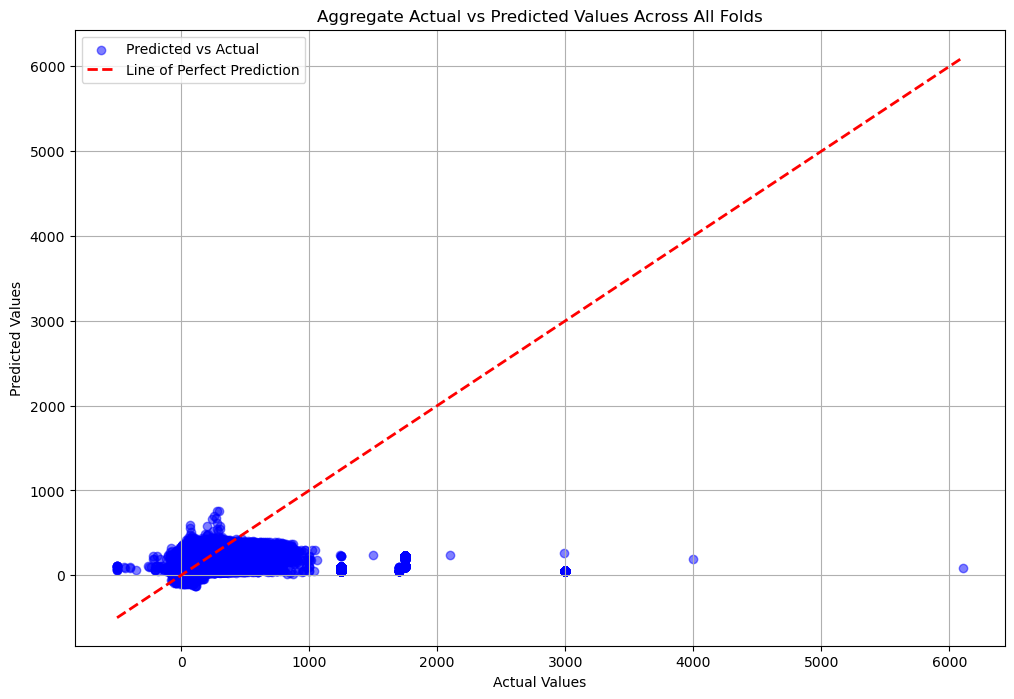

In [20]:
# Plotting the aggregate actual vs predicted values
plt.figure(figsize=(12, 8))
plt.scatter(all_y_actual, all_y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([min(all_y_actual), max(all_y_actual)], [min(all_y_actual), max(all_y_actual)], 'r--', lw=2, label='Line of Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Aggregate Actual vs Predicted Values Across All Folds')
plt.legend()
plt.grid(True)
plt.show()

scaling and using robust models 

In [2]:
y_test = pd.read_csv("y_test.csv")
y_train=pd.read_csv("y_train.csv")
X_train_scaled = pd.read_csv("X_train_scaled.csv")
X_test_scaled = pd.read_csv("X_test_scaled.csv")

In [3]:
from sklearn.linear_model import HuberRegressor
huber = HuberRegressor()

# Fit the model on the scaled training data
huber.fit(X_train_scaled, y_train)

c:\Users\luisf\anaconda3\envs\MLLab\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\luisf\anaconda3\envs\MLLab\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


HuberRegressor()

In [5]:
from sklearn.metrics import mean_squared_error
y_pred = huber.predict(X_test_scaled)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 14067.600699806435


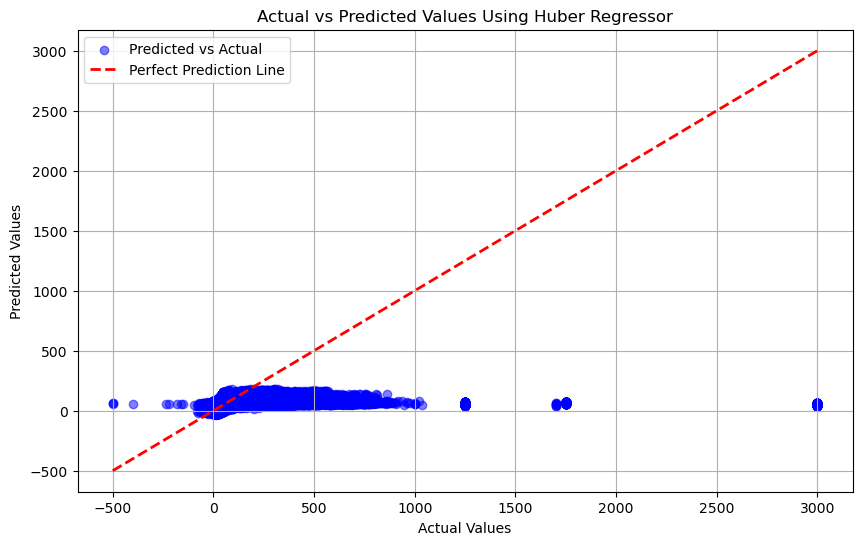

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values Using Huber Regressor')
plt.legend()
plt.grid(True)
plt.show()